# evaluation functions 

In [1]:
#libraries
import matplotlib
matplotlib.use('Agg')
#import torch
import numpy as np
from sklearn.metrics import roc_curve, auc, roc_auc_score, cohen_kappa_score, jaccard_similarity_score, log_loss,recall_score, precision_score
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle
import matplotlib.pyplot as plt
from PIL import Image
from utils.eval import *
from utils.dataloader import *
import os
from itertools import chain

%matplotlib inline


In [2]:
experiments = '/gpfs/scratch/bilals01/test-repo/experiments/'
log_file = '/gpfs/scratch/bilals01/test-repo/logs/exp7_train.log'

exp_name = 'exp7'
num_class = 3
pred_label = 'val_pred_label_avg_epoch_4.npy'

class_names, class_codes, class_coding = get_class_coding(log_file)
print(class_codes)
print(class_coding)

[0, 1, 2]
{0: 'Solid_Tissue_Normal', 1: 'TCGA-LUAD', 2: 'TCGA-LUSC'}


In [3]:
os.chdir(experiments + exp_name+ '/outputs/') #input
pd = np.load(open(pred_label, 'rb'))
predictions = pd[:,1:num_class+1] 
labels = pd[:,num_class+1]
predictions = np.asarray([[float(j) for j in i] for i in predictions])
labels = np.asarray([float(i) for i in labels])

AUC:
{0: 0.9893610968879786, 1: 0.8894927536231884, 2: 0.9359721184963903, 'micro': 0.8981858925273637, 'macro': 0.9405244698982976, 'precision': 0.8062678062678064, 'recall': 0.7432820034023692, 'cohenskappa': 0.6028567523236741, 'jaccard': 0.738255033557047, 'logloss': 0.606709718039543}
CU:
{0: 0.9965257972517502, 1: 0.9204123910006262, 2: 0.9617027692616977, 'micro': 0.9148646749669767, 'macro': 0.9946521021789839}
CL:
{0: 0.980085348506401, 1: 0.8531579708050296, 2: 0.9091416679356378, 'micro': 0.8798718003687347, 'macro': 0.8677655677655678}


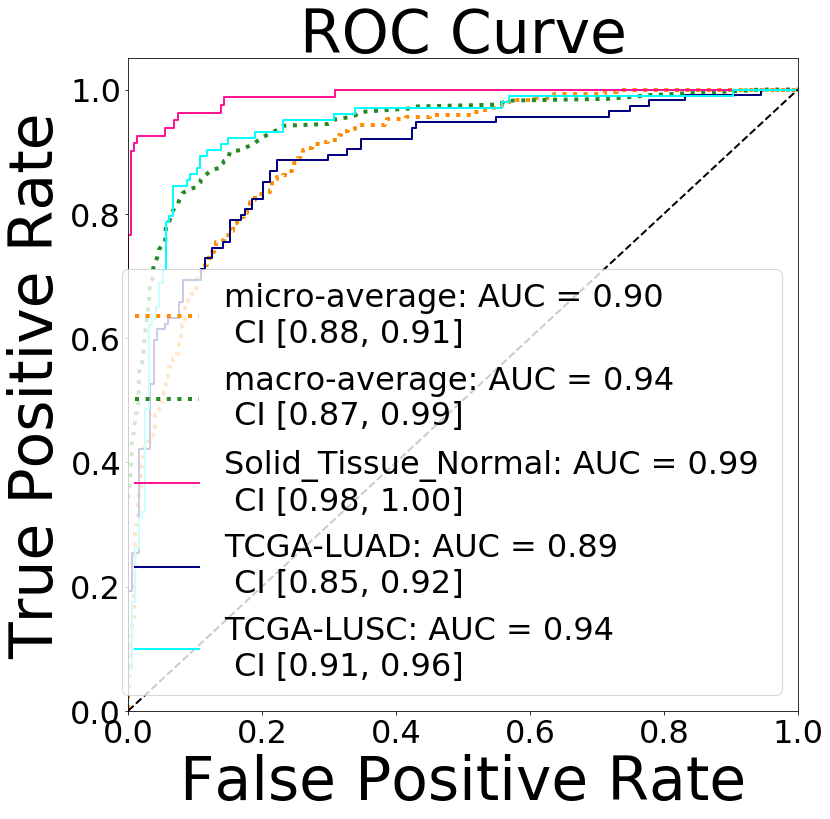

In [4]:
#output 
#tpr; true positive rate
#fpr; false positive rate
#roc_auc; main eval metrics
#cu; upper confidence interval
#cl; lower confidence interval
fpr, tpr, roc_auc, cu, cl = get_auc(predictions, labels, class_names, class_codes)

os.chdir(experiments+exp_name+'/outputs/')
plt.savefig(pred_label[:-8]+'.png', dpi=500, bbox_inches = 'tight')

#create a data frame
results = {}
[class_coding,roc_auc,cu,cl ]
results['class_coding'] = class_coding
results['eval_metrics'] = roc_auc
results['cu'] = cu
results['cl'] = cl
results

#write to json
import json
with open(pred_label[:-8]+'_results.json', 'w') as outfile:
    json.dump(results, outfile)

#write true positive and false positive rates if needed
#import pickle
#filehandler = open(b"tpr_fpr.pkl","wb")
#pickle.dump([tpr,fpr],filehandler)
#filehandler.close()
